In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline  

FOLDER = 'plots/'

## Load and set params:

In [2]:
raw_res = pd.read_csv('raw_results.csv')

In [3]:
raw_res.columns=['Participant', 'Sexe', 'B_sexe', 'Age', 'Groupe', 'APP', 'TEST','Delta']
print(raw_res.columns.values)
for i in range(1,5):
    print(raw_res.loc[raw_res['Groupe'] == i].head(1))
raw_res.tail(5)

['Participant' 'Sexe' 'B_sexe' 'Age' 'Groupe' 'APP' 'TEST' 'Delta']
  Participant Sexe  B_sexe  Age  Groupe  APP  TEST  Delta
0        AA1F    F       0   19       1   17    15     -2
   Participant Sexe  B_sexe  Age  Groupe  APP  TEST  Delta
10        AB1H    H       1   19       2   12    14      2
   Participant Sexe  B_sexe  Age  Groupe  APP  TEST  Delta
20        BB1F    F       0   19       3   11     9     -2
   Participant Sexe  B_sexe  Age  Groupe  APP  TEST  Delta
30        BA1H    H       1   19       4   11     9     -2


,Participant,Sexe,B_sexe,Age,Groupe,APP,TEST,Delta
35,BA6H,H,1,22,4,18,13,-5
36,BA7F,F,0,22,4,12,10,-2
37,BA8F,F,0,19,4,16,17,1
38,BA9H,H,1,21,4,11,11,0
39,BA10F,F,0,21,4,14,12,-2


In [4]:
# add category column
def label_retention (row):
    """Compute percentage of retention"""
    return row['TEST']/row['APP']*100

#raw_res['category'] = raw_res.loc[raw_res['Groupe'] == i]
def label_category (row):
    # if Groupe AA or BB
    if row['Groupe'] in [1,3] : return 0
    if row['Groupe'] in [2,4] : return 1
    else : return 2

raw_res['retention'] = raw_res.apply(lambda x : label_retention(x), axis=1)
raw_res['category'] = raw_res.apply(lambda x : label_category(x), axis=1)
raw_res.head()

,Participant,Sexe,B_sexe,Age,Groupe,APP,TEST,Delta,retention,category
0,AA1F,F,0,19,1,17,15,-2,88.235294,0
1,AA2F,F,0,26,1,15,13,-2,86.666667,0
2,AA3H,H,1,20,1,16,16,0,100.000000,0
3,AA4H,H,1,19,1,14,13,-1,92.857143,0
4,AA5F,F,0,26,1,9,8,-1,88.888889,0


In [5]:
#pd.plotting.scatter_matrix(raw_res, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

#sns.pairplot(raw_res);

#df.loc[df['column_name'].isin(some_values)]

# Helper funcitons:

In [6]:
def mean(filter_col,col='TEST'):
    return pd.DataFrame(resultats.groupby(by=filter_col).mean()[col])

def std(filter_col,col='TEST'):
    return pd.DataFrame(resultats.groupby(by=filter_col).std()[col])

def test_mean(col):
    count = resultats.groupby(by=col).count()
    sum_ = resultats.groupby(by=col).sum()
    return sum_/count

def test_mean_double(col1,col2):
    count = resultats.groupby(by=[col1,col2]).count()
    sum_ = resultats.groupby(by=[col1,col2]).sum()
    return sum_/count

In [7]:
salles = ['AA','AB','BA','BB']
groupes = [1,2,3,4]
categories = [0,1]

## Correlation:

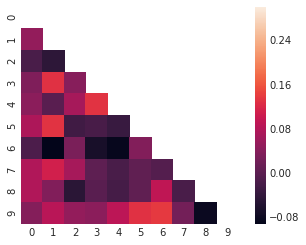

In [8]:
corr = np.corrcoef(np.random.randn(10, 200))
>>> mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
...     ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

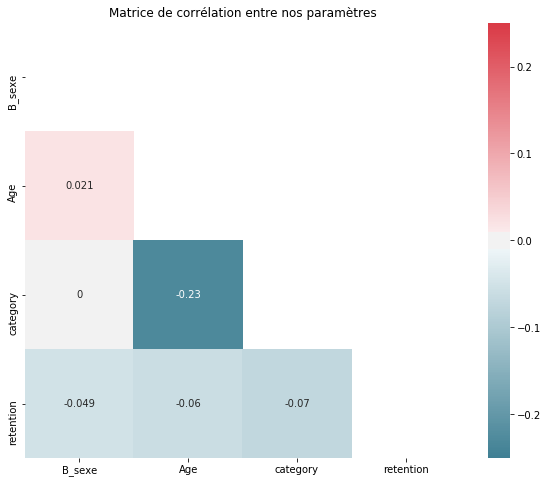

In [16]:
# choose the columns to plot
columns_to_plot = ['B_sexe','Age', 'category','retention']
# 'APP', 'TEST', 'Delta'
def plot_corr(df,columns_to_plot):
    f, ax = plt.subplots(figsize=(10, 8))
    corr = df[columns_to_plot].corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    #mask = np.zeros_like(corr, dtype=np.bool)
    sns.heatmap(corr, vmin=-0.25, vmax=0.25,annot=True, mask=mask,\
                       cmap=sns.diverging_palette(220, 10, as_cmap=True),
                square=True, ax=ax)

plot_corr(raw_res,columns_to_plot)
plt.title('Matrice de corrélation entre nos paramètres')
plt.savefig(FOLDER + 'correlation_matrix.png')

## compute the retention percentage of each context

In [24]:
def compute_precentage_mean(df,groupe,app_col = 'APP', test_col = 'TEST'):
    """Percentage computed tested divided by learned"""
    test = df[test_col][df['Groupe']==groupe]
    appr = df[app_col][df['Groupe']==groupe]
    percentage = test/appr*100
    return percentage.mean(), percentage.std()

mean_percentage = []
std_percentage = []
for x in groupes:
    tmp, std_ = compute_precentage_mean(raw_res,x)
    mean_percentage.append(tmp)
    std_percentage.append(std_)
    print('mean pourcentage d"oubli in salle:',x,'    ',tmp,' % and std:  ',std_)
print('Same: ',(mean_percentage[0]+mean_percentage[3])/2, '   With mean std:  ', (std_percentage[0]+std_percentage[3])/2)
print('Different: ',(mean_percentage[1]+mean_percentage[2])/2, '   With mean std:  ', (std_percentage[1]+std_percentage[2])/2)
for i in mean

mean pourcentage d"oubli in salle: 1      92.46566505390037  % and std:   6.227578580323969
mean pourcentage d"oubli in salle: 2      89.66025641025641  % and std:   17.623201986791916
mean pourcentage d"oubli in salle: 3      88.39685314685315  % and std:   17.724371816858536
mean pourcentage d"oubli in salle: 4      87.26535311094133  % and std:   13.793264940793486
Same:  89.86550908242086    With mean std:   10.010421760558728
Different:  89.02855477855478    With mean std:   17.673786901825224


In [48]:
def median_per_group(df,groupe,col = 'Delta'):
    return np.median(df[col][df['Groupe'] == groupe])
def median_per_cat(df,cat,col = 'Delta'):
    return np.median(df[col][df['category'] == cat])
def mean_per_group(df,groupe,col = 'Delta'):
    return np.mean(df[col][df['Groupe'] == groupe])
def mean_per_cat(df,cat,col = 'Delta'):
    return np.mean(df[col][df['category'] == cat])

for i in groupes:
    print('Median groupe ',i ,median_per_group(raw_res,i),\
         'Mean groupe ',i,' :', mean_per_group(raw_res,i))
for i in categories:
    print ('Median cat ',i,' :', median_per_cat(raw_res,i),\
          'Mean cat ',i,' :', mean_per_cat(raw_res,i))

tmp_list = []
for i in categories:
    tmp = mean_per_cat(raw_res,i)/20*100
    print('mean % per cat: ',tmp)
    tmp_list.append(tmp)
print ('{:.2f}'.format(100-tmp_list[0]/tmp_list[1]*100),'% of difference')

Median groupe  1 -1.0 Mean groupe  1  : -1.0
Median groupe  2 -2.0 Mean groupe  2  : -1.3
Median groupe  3 -1.5 Mean groupe  3  : -1.6
Median groupe  4 -2.0 Mean groupe  4  : -1.8
Median cat  0  : -1.0 Mean cat  0  : -1.3
Median cat  1  : -2.0 Mean cat  1  : -1.55
mean % per cat:  -6.5
mean % per cat:  -7.75
16.13 % of difference


## scatter plots

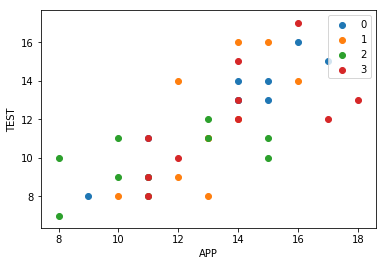

In [49]:
def scatter_plot_by_salle(df,col_x,col_y):
    for i,group in enumerate(groupes):
        x = df[col_x][df['Groupe']==group]
        y = df[col_y][(df['Groupe']==group)]
        p = plt.scatter(x, y,label=str(i))
    plt.xlabel(str(col_x))
    plt.ylabel(str(col_y))
    plt.legend()
    plt.show()
    
scatter_plot_by_salle(raw_res,col_x='APP',col_y='TEST')

By sexe:  retention  as a function of  Age


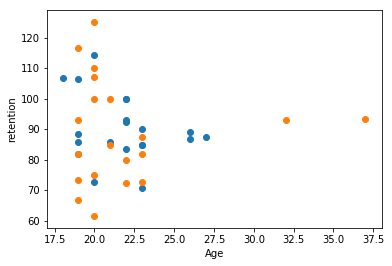

In [50]:
def scatter_plot_by_sex(df, col_x,col_y):
    sexes = ['F','H']
    print('By sexe: ', str(col_y),' as a function of ', str(col_x))
    for sex in sexes:
        x = df[col_x][df['Sexe']==sex]
        y = df[col_y][(df['Sexe']==sex)]
        plt.scatter(x, y)
    plt.xlabel(str(col_x))
    plt.ylabel(str(col_y))
    plt.show()
#scatter_plot_by_sex(col_x='CRI APP',col_y='TEST')
scatter_plot_by_sex(raw_res, col_x='Age',col_y='retention')

# Bar_plots

In [65]:
# See distribution between the different accident group
plt.figure(figsize=(15,5))
ax = sns.boxplot(x="YEAR", y="CONDITIONS_LUMINEUSES", 
                 data=condlum_pvt, order=['Jour', 'Nuit', 'Aurore / crépuscule', 'Inconnu'], palette=palette)
plt.title("Light conditions distribution between accident group", fontsize=22).set_weight('bold')
tick_format(ax, 2)
ax.set(xticks=np.linspace(0,1,num=11))
ax.set_ylabel('Light conditions', fontsize=16).set_weight('bold')
ax.set_xlabel('Light conditions ratio [%]', fontsize=16).set_weight('bold')

NameError: name 'condlum_pvt' is not defined

In [90]:
df = raw_res
np.mean(df['retention'],axis=0)
cat_mean_df = df.groupby(['category']).mean()
groupe_mean_df =  df.groupby(['Groupe']).mean()
cat_std_df = df.groupby(['category']).std()
groupe_std_df =  df.groupby(['Groupe']).std()
display( cat_mean_df )
display( cat_std_df )
display( groupe_mean_df  )
cat_mean_df.index.values

,B_sexe,Age,Groupe,APP,TEST,Delta,retention
category,,,,,,,
0,0.5,22.70,2.0,12.5,11.20,-1.30,90.431259
1,0.5,21.05,3.0,13.5,11.95,-1.55,88.462805


,B_sexe,Age,Groupe,APP,TEST,Delta,retention
category,,,,,,,
0,0.512989,4.657761,1.025978,2.704772,2.504732,1.592747,13.097209
1,0.512989,2.064104,1.025978,2.139848,2.799906,2.163696,15.451385


,B_sexe,Age,APP,TEST,Delta,category,retention
Groupe,,,,,,,
1,0.5,24.6,13.6,12.6,-1.0,0.0,92.465665
2,0.5,20.9,13.2,11.9,-1.3,1.0,89.660256
3,0.5,20.8,11.4,9.8,-1.6,0.0,88.396853
4,0.5,21.2,13.8,12.0,-1.8,1.0,87.265353


array([0, 1])

<Container object of 4 artists>

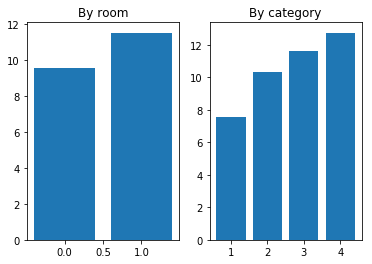

In [89]:
def cat_mean_bar_plot():
    p = plt.bar(cat_mean_df.index.values,100 - cat_mean_df['retention'].values)
    return p
def cat_mean_bar_plot():
    p = plt.bar(cat_mean_df.index.values,100 - cat_mean_df['retention'].values)
    return p

fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].set_title('By room')
axes[1].set_title('By category')

axes[0].bar(cat_mean_df.index.values,100 - cat_mean_df['retention'].values)
axes[1].bar(groupe_mean_df.index.values,100 - groupe_mean_df['retention'].values)

In [ ]:
salles = ['AA','AB','BA','BB']
N = len(salles)
pourcentages = mean_percentage
menStd = std_percentage
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, pourcentages, width, yerr=menStd)
#p2 = plt.bar(ind, womenMeans, width,
#             bottom=menMeans, yerr=womenStd)

plt.ylabel('Pourcentage de rétention')
plt.title('Pourcentage de rétention par salle')
plt.xticks(ind, salles)
plt.yticks(np.arange(0, 110, 10))
#plt.legend('Men')

plt.savefig('Pourcentage de rétention par salle.png')
plt.show()

In [2]:
from numpy.random import normal
import pyvttbl as pt
from collections import namedtuple
 
N = 40
P = ["noise","quiet"]
rts = [998,511]
mus = rts*N
 
Sub = namedtuple('Sub', ['Sub_id', 'rt','condition'])               
df = pt.DataFrame()
for subid in xrange(0,N):
    for i,condition in enumerate(P):
        df.insert(Sub(subid+1,
                     normal(mus[i], scale=112., size=1)[0],
                           condition)._asdict()

ImportError: cannot import name 'PyvtTbl'

In [ ]:
dataframe.anova('dv', sub='id', wfactors=['iv1',      'iv2'])

In [3]:
from statsmodels.stats.anova import anova_lm

In [ ]:
anova_lm

In [7]:
import pandas as pd
import numpy as np
from scipy import stats

def calc_grandmean(data, columns):
    """
    Takes a pandas dataframe and calculates the grand mean
    data = dataframe
    columns = list of column names with the response variables
    """
    gm = np.mean(data[columns].mean())
    return gm

##For createing example data
X1 = [6,4,5,1,0,2]
X2 = [8,5,5,2,1,3]
X3 = [10,6,5,3,2,4]

df = pd.DataFrame({'Subid':range(1, len(X1)+1), "X1":X1, "X2":X2, "X3":X3})

#Grand mean
grand_mean = calc_grandmean(df, ['X1', 'X2', 'X3'])
df['Submean'] = df[['X1', 'X2', 'X3']].mean(axis=1)
column_means = df[['X1', 'X2', 'X3']].mean(axis=0)
df

,Subid,X1,X2,X3,Submean
0,1,6,8,10,8.0
1,2,4,5,6,5.0
2,3,5,5,5,5.0
3,4,1,2,3,2.0
4,5,0,1,2,1.0
5,6,2,3,4,3.0


In [9]:
n = len(df['Subid'])
k = len(['X1', 'X2', 'X3'])
#Degree of Freedom
ncells = df[['X1','X2','X3']].size

dftotal = ncells - 1
dfbw = 3 - 1
dfsbj = len(df['Subid']) - 1
dfw = dftotal - dfbw
dferror = dfw - dfsbj
######################################################################################
               
               
               
SSbetween = sum(n*[(m - grand_mean)**2 for m in column_means])
SSwithin = sum(sum([(df[col] - column_means[i])**2 for i,
              col in enumerate(df[['X1', 'X2', 'X3']])]))
SSsubject = sum(k*[(m -grand_mean)**2 for m in df['Submean']])
SSerror = SSbetween + SSwithin
#SSwithin - SSsubjectSStotal = SSbetween + SSwithin
######################################################################################
#MSbetween
msbetween = SSbetween/dfbetween

#MSerror
mserror = SSerror/dferror

#F-statistic
F = msbetween/mserror

               
alpha = 0.05

p_value = stats.f.sf(F, 2, dferror)

NameError: name 'dfbetween' is not defined